In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [2]:
%%R
library("phyloseq")
library(ggplot2)

In [3]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
physeq = ps.merged

In [4]:
%%R
ps.b = subset_taxa(physeq,Kingdom=="Bacteria")
ps.b = subset_samples(ps.b,sample_sums(physeq)>3000)

In [5]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>1500)

In [6]:
%%R
physeq.2.5.noSmall<-subset_samples(physeq.noSmall, Month==2.5)

In [7]:
%%R
physeq.2.5<-subset_samples(physeq, Month==2.5)

In [8]:
%%R
ps <- physeq.noSmall

In [9]:
%%R
sample_data(ps)

Sample Data:        [58 samples by 3 sample variables]:
         Cosm Month          Trtmt
F_2_15     15   2.0   Ferrihydrite
F_2_28     28   2.0   Ferrihydrite
F_2_33     33   2.0   Ferrihydrite
F_2_9       9   2.0   Ferrihydrite
F_2.5_13   13   2.5   Ferrihydrite
F_2.5_14   14   2.5   Ferrihydrite
F_2.5_16   16   2.5   Ferrihydrite
F_2.5_27   27   2.5   Ferrihydrite
F_2.5_3     3   2.5   Ferrihydrite
F_2.5_30   30   2.5   Ferrihydrite
F_2.5_31   31   2.5   Ferrihydrite
F_2.5_42   42   2.5   Ferrihydrite
F_2.5_49   49   2.5   Ferrihydrite
F_3_12     12   3.0   Ferrihydrite
F_3_20     20   3.0   Ferrihydrite
F_3_22     22   3.0   Ferrihydrite
F_3_23     23   3.0   Ferrihydrite
F_3_44     44   3.0   Ferrihydrite
H_2.5_13   13   2.5 Heavy Fraction
H_2.5_3     3   2.5 Heavy Fraction
H_2.5_42   42   2.5 Heavy Fraction
K_2.5_14   14   2.5      Kaolinite
K_2.5_16   16   2.5      Kaolinite
K_2.5_3     3   2.5      Kaolinite
K_2.5_42   42   2.5      Kaolinite
K_3_12     12   3.0      Kaolinite

In [10]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))
sample_data(ps_snorm)$Sum = sample_sums(ps)

In [11]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

Run 0 stress 0.08807321 
Run 1 stress 0.08644615 
... New best solution
... Procrustes: rmse 0.03809733  max resid 0.224521 
Run 2 stress 0.08645106 
... Procrustes: rmse 0.001367559  max resid 0.006158305 
... Similar to previous best
Run 3 stress 0.08645462 
... Procrustes: rmse 0.001627758  max resid 0.008808283 
... Similar to previous best
Run 4 stress 0.1034979 
Run 5 stress 0.08801025 
Run 6 stress 0.0864608 
... Procrustes: rmse 0.002192041  max resid 0.01003049 
Run 7 stress 0.0880324 
Run 8 stress 0.09639112 
Run 9 stress 0.08801934 
Run 10 stress 0.08818527 
Run 11 stress 0.08801193 
Run 12 stress 0.08801712 
Run 13 stress 0.08802387 
Run 14 stress 0.08989053 
Run 15 stress 0.0988698 
Run 16 stress 0.08800928 
Run 17 stress 0.08645409 
... Procrustes: rmse 0.002252879  max resid 0.01051325 
Run 18 stress 0.08892181 
Run 19 stress 0.088002 
Run 20 stress 0.08645677 
... Procrustes: rmse 0.001802985  max resid 0.008135452 
... Similar to previous best
*** Solution reached


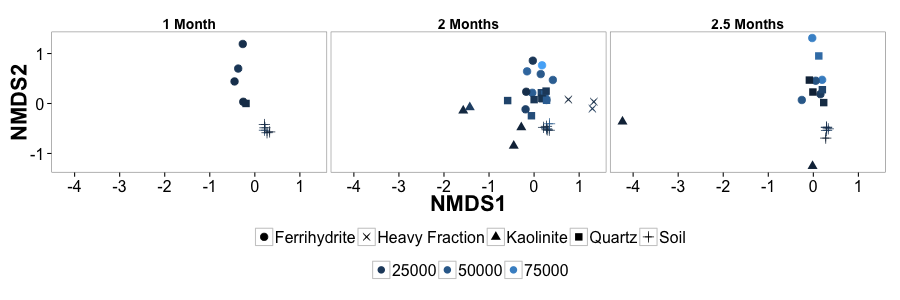

In [12]:
%%R -h 300 -w 900
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Sum", shape = "Trtmt", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) #+ scale_colour_manual(values=c("red3","darkorange","chartreuse4","skyblue3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      legend.position = "bottom",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [87]:
%%R
ggsave(filename="NMDS-16S-3month.jpg", plot=p ,width=8.5, height=4)

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
See Soil_Effect notebook. There is not a significant difference detected.

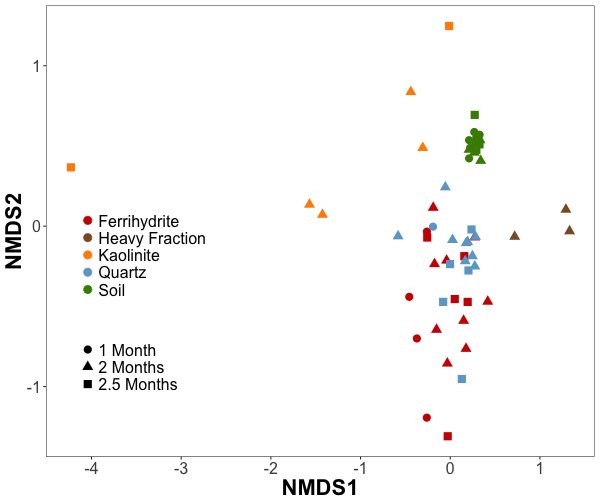

In [26]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("red3","tan4","darkorange","skyblue3","chartreuse4","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0.05,0.6),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [27]:
%%R
ggsave(filename="NMDS-16S-AllMonths.Rachel.jpg", plot=p ,width=6, height=6)

Error in { : task 367 failed - "Interrupted"
In addition: Warning message:
In UniFrac(physeq, ...) :
  Randomly assigning root as -- 58_179884 -- in the phylogenetic tree in the data you provided.
Square root transformation
Wisconsin double standardization
Run 0 stress 0.09380201 
Run 1 stress 0.09445325 
Run 2 stress 0.09523874 
Run 3 stress 0.09418401 
... procrustes: rmse 0.01205185  max resid 0.06188465 
Run 4 stress 0.09380017 
... New best solution
... procrustes: rmse 0.0002785023  max resid 0.001598697 
*** Solution reached


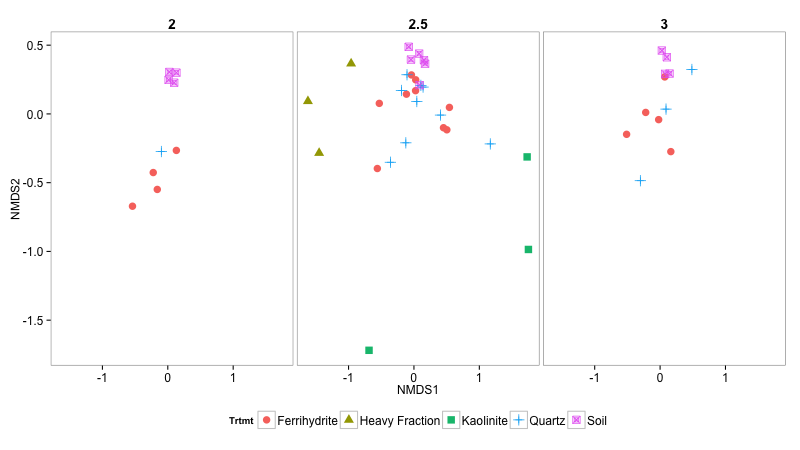

In [19]:
%%R -h 450 -w 800
# Computing the Bray distance matrix and NMDS in parallel

#ps = prune_samples(sample_data(ps_snorm)$Trtmt=="Soil"|sample_data(ps_snorm)$Trtmt=="Ferrihydrite", ps_snorm)

ord.full = ordinate(ps, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

D <- ord.full
# Sets the relevant ordination

sample_data(ps)$Cosm=as.factor(sample_data(ps)$Cosm)
sample_data(ps)$Month=as.factor(sample_data(ps)$Month)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps, D, color = "Trtmt", shape = "Trtmt", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 

p = p + guides(color = element_blank(), shape = element_blank())

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
      legend.position = "bottom"
    ,plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~Month)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

### Checking to make sure that ordination isn't just grouping sample counts

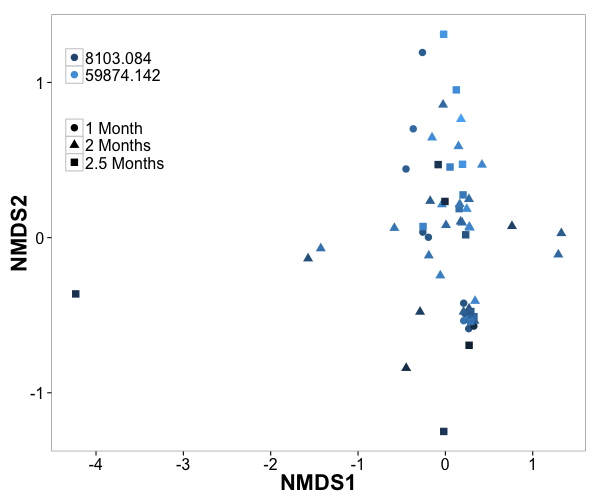

In [22]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Sum", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) #+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))
p = p + scale_colour_continuous(trans="log")

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0,1),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p